In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r'/Users/tinghaokao/Desktop/data/usercase/Use_case_data.xlsx - Sheet1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   User_ID                              89 non-null     float64
 1   Gender                               89 non-null     object 
 2   Age                                  89 non-null     float64
 3   Location                             89 non-null     object 
 4   Verification                         89 non-null     object 
 5   Sexual_orientation                   89 non-null     object 
 6   Sexual_polarity                      89 non-null     object 
 7   Looking_for                          88 non-null     object 
 8   Points_Rank                          89 non-null     object 
 9   Member_since                         89 non-null     int64  
 10  Number_of_Comments_in_public_forum   89 non-null     int64  
 11  Number_of_advertisments_posted    

In [5]:
data['Risk'] = data.Risk.str.contains('High_risk').astype(int)

In [6]:
data.drop('User_ID', axis=1, inplace=True)

In [21]:
data_numeric = data.select_dtypes(include=np.number)

In [22]:
data_numeric

,Age,Points_Rank,Member_since,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk
0,34.6,50.0,41169,32,0.0,0.0,0.0,0
1,32.2,518.0,40118,710,9.0,0.0,0.0,0
2,33.6,150.0,41365,25,1.0,1.0,45.0,0
3,34.0,114.0,41372,107,1.0,0.0,1.0,0
4,39.5,497.0,41378,600,0.0,6.0,8.0,0
...,...,...,...,...,...,...,...,...
84,36.2,52.0,41088,51,1.0,0.0,0.0,1
85,29.9,155.0,41091,209,0.0,0.0,0.0,1
86,52.3,114.0,41092,120,1.0,0.0,0.0,1
87,28.8,10.0,41094,11,0.0,0.0,0.0,1


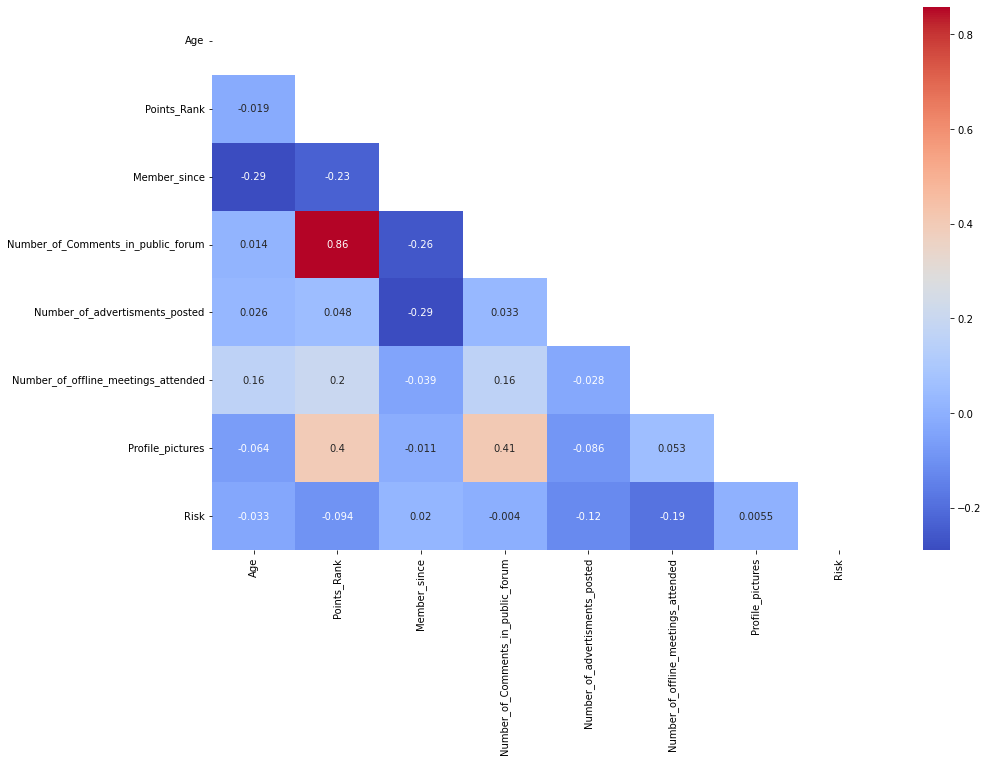

In [23]:
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix,
            annot=True,
            cmap= 'coolwarm',
            mask=mask)
plt.show()

In [24]:
data.isnull().sum()

Gender                                 0
Age                                    0
Location                               0
Verification                           0
Sexual_orientation                     0
Sexual_polarity                        0
Looking_for                            0
Points_Rank                            1
Member_since                           0
Number_of_Comments_in_public_forum     0
Number_of_advertisments_posted         0
Number_of_offline_meetings_attended    0
Profile_pictures                       0
Risk                                   0
dtype: int64

In [25]:
data[data['Looking_for'].isnull()]

,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Member_since,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk


In [26]:
data.dropna(inplace=True)

In [27]:
data[data['Looking_for'].isnull()]

,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Member_since,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures,Risk


In [28]:
data.isnull().sum()

Gender                                 0
Age                                    0
Location                               0
Verification                           0
Sexual_orientation                     0
Sexual_polarity                        0
Looking_for                            0
Points_Rank                            0
Member_since                           0
Number_of_Comments_in_public_forum     0
Number_of_advertisments_posted         0
Number_of_offline_meetings_attended    0
Profile_pictures                       0
Risk                                   0
dtype: int64

In [29]:
data['Gender'].value_counts()

male      70
female    17
Name: Gender, dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 87
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gender                               87 non-null     object 
 1   Age                                  87 non-null     float64
 2   Location                             87 non-null     object 
 3   Verification                         87 non-null     object 
 4   Sexual_orientation                   87 non-null     object 
 5   Sexual_polarity                      87 non-null     object 
 6   Looking_for                          87 non-null     object 
 7   Points_Rank                          87 non-null     float64
 8   Member_since                         87 non-null     int64  
 9   Number_of_Comments_in_public_forum   87 non-null     int64  
 10  Number_of_advertisments_posted       87 non-null     float64
 11  Number_of_offline_meetings_attende

In [31]:
data['Points_Rank'] = data['Points_Rank'].apply(pd.to_numeric, errors='coerce')

In [32]:
data['Points_Rank'].dtypes

dtype('float64')

In [39]:
xlist = data[data.columns.tolist()[:-1]]
xlist

,Gender,Age,Location,Verification,Sexual_orientation,Sexual_polarity,Looking_for,Points_Rank,Member_since,Number_of_Comments_in_public_forum,Number_of_advertisments_posted,Number_of_offline_meetings_attended,Profile_pictures
0,male,34.6,A,Non_Verified,Homosexual,Switch,Men,50.0,41169,32,0.0,0.0,0.0
1,male,32.2,J,Non_Verified,Heterosexual,Dominant,Women,518.0,40118,710,9.0,0.0,0.0
2,male,33.6,K,Non_Verified,Heterosexual,Dominant,Women,150.0,41365,25,1.0,1.0,45.0
3,male,34.0,H,Non_Verified,Heterosexual,Dominant,Women,114.0,41372,107,1.0,0.0,1.0
4,male,39.5,B,Non_Verified,Heterosexual,Dominant,Women,497.0,41378,600,0.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,male,41.4,K,Non_Verified,Homosexual,Submisive,Men,62.0,41084,30,0.0,0.0,7.0
84,male,36.2,N,Non_Verified,Heterosexual,Submisive,Women,52.0,41088,51,1.0,0.0,0.0
85,male,29.9,A,Non_Verified,Heterosexual,Submisive,Women,155.0,41091,209,0.0,0.0,0.0
86,male,52.3,A,Non_Verified,Heterosexual,Submisive,Women,114.0,41092,120,1.0,0.0,0.0


In [41]:
ylist = data['Risk']
ylist

0     0
1     0
2     0
3     0
4     0
     ..
83    1
84    1
85    1
86    1
87    1
Name: Risk, Length: 87, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(xlist, ylist, train_size=0.8, test_size=0.2)

In [45]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression

In [46]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = LR.predict(x_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

ValueError: could not convert string to float: 'male'